#  2020AIML544 - CLASSIFICATION - ASSIGNMENT1
##  CANCER SUSCEPTIBILITY PREDICTION

## Overall Approach

### EDA TASKS PERFORMED:
    1. READ THE EXCEL FILE INTO A DATAFRAME  
    2. CHECK THE STATISTICS OF DATA USING DESCRIBE FUNCTION
    3. CHECK FOR DUPLICATE ROWS & NULL VALUES 
    4. CHANGE TO APPROPRIATE DATATYPES    
    5. SCATTERPLOTS & PAIRPLOTS OF ATTRIBUTES
    6. HEATMAP TO SHOW CORRELATION
    7. SCALING OF DATA USING STANDARDSCALAR

### MODEL BUILDING:
    1. BUILD KNN CLASSIFIER MODEL
    2. PLOT ELBOW CURVE
    3. FIND BEST 'K' VALUE
    
### MODEL PERFORMANCE ANALYSIS:
    1. PRINT CONFUSION MATRIX
    2. FIND F1 SCORE
    3. CROSS VALIDATION USING GRIDSEARCHCV
    

#### Import all needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## <span style='color: darkblue'>Task 1: EXPLORATORY DATA ANALYSIS </span>

#### Read the input excel file into a dataframe

In [2]:
file_path = r"C:\Users\Aspire V3-572\Desktop\AIML Mini Project\Classification\Cancer_Dataset.CSV"

df = pd.read_csv(file_path,header=0)

#### Display information about the dataframe using head function

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Check the number of records in the dataset using shape function

In [4]:
df.shape

(768, 9)

There are 768 records and 9 attributes in the dataset.

Let's take a quick look at the columns

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Cancer_Markers', 'Age', 'Outcome'],
      dtype='object')

#### Check the statistics of numerical attributes using describe function

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Cancer_Markers,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<span style='background : yellow' > **Observation:**   </span> This is the statistical summary of the data. We can obseve the mean, standard deviation, minimum and maximum values of all the numerical attributes

    In our data, 'Pregnancies' has min value as '0', max as '17, mean as '3.845052' & standard deviation as '3.369578' 

### <span style='color: Black'>Data Cleaning </span>

<b>
Checking for duplicate rows
</b>

<span style='background : yellow' > **Observation:**   </span>
* There are no duplicate rows in our dataset

In [7]:
dv = df.duplicated(keep=False)
dv.sum()

0

### <span style='color: Black'>Missing Values Imputation </span>

<span style='background : yellow' > **Observation:**   </span> 
* There are no Null values in any of the records in our dataset. 
* However, there are zero values in Glucose, BloodPressure, SkinThickness, Insulin & BMI attributes which is incorrect.   
* Hence I am going to impute the zeroes in these attributes with the mean value of the respective columns. 

In [8]:
df.isnull().sum()

Pregnancies       0
Glucose           0
BloodPressure     0
SkinThickness     0
Insulin           0
BMI               0
Cancer_Markers    0
Age               0
Outcome           0
dtype: int64

In [9]:
#Replacing zeroes with nan and then replacing all nan's with mean of the respective column
df['Glucose']=df['Glucose'].replace(0, np.nan)
df['BloodPressure']=df['BloodPressure'].replace(0, np.nan)
df['SkinThickness']=df['SkinThickness'].replace(0, np.nan)
df['Insulin']=df['Insulin'].replace(0, np.nan)
df['BMI']=df['BMI'].replace(0, np.nan)
df=df.fillna(df.mean())

<b>
Check the quality of the data and data types of each column using info function
</b>

<span style='background : yellow' > **Observation:**   </span>

The datatypes are appropriate for input attributes. The output attribute's datatype needs to be changed to categorical for classification model and I will do it after the train test split while model building

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pregnancies     768 non-null    int64  
 1   Glucose         768 non-null    float64
 2   BloodPressure   768 non-null    float64
 3   SkinThickness   768 non-null    float64
 4   Insulin         768 non-null    float64
 5   BMI             768 non-null    float64
 6   Cancer_Markers  768 non-null    float64
 7   Age             768 non-null    int64  
 8   Outcome         768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


### Pairplots 
#### To visualize the relationship between attributes

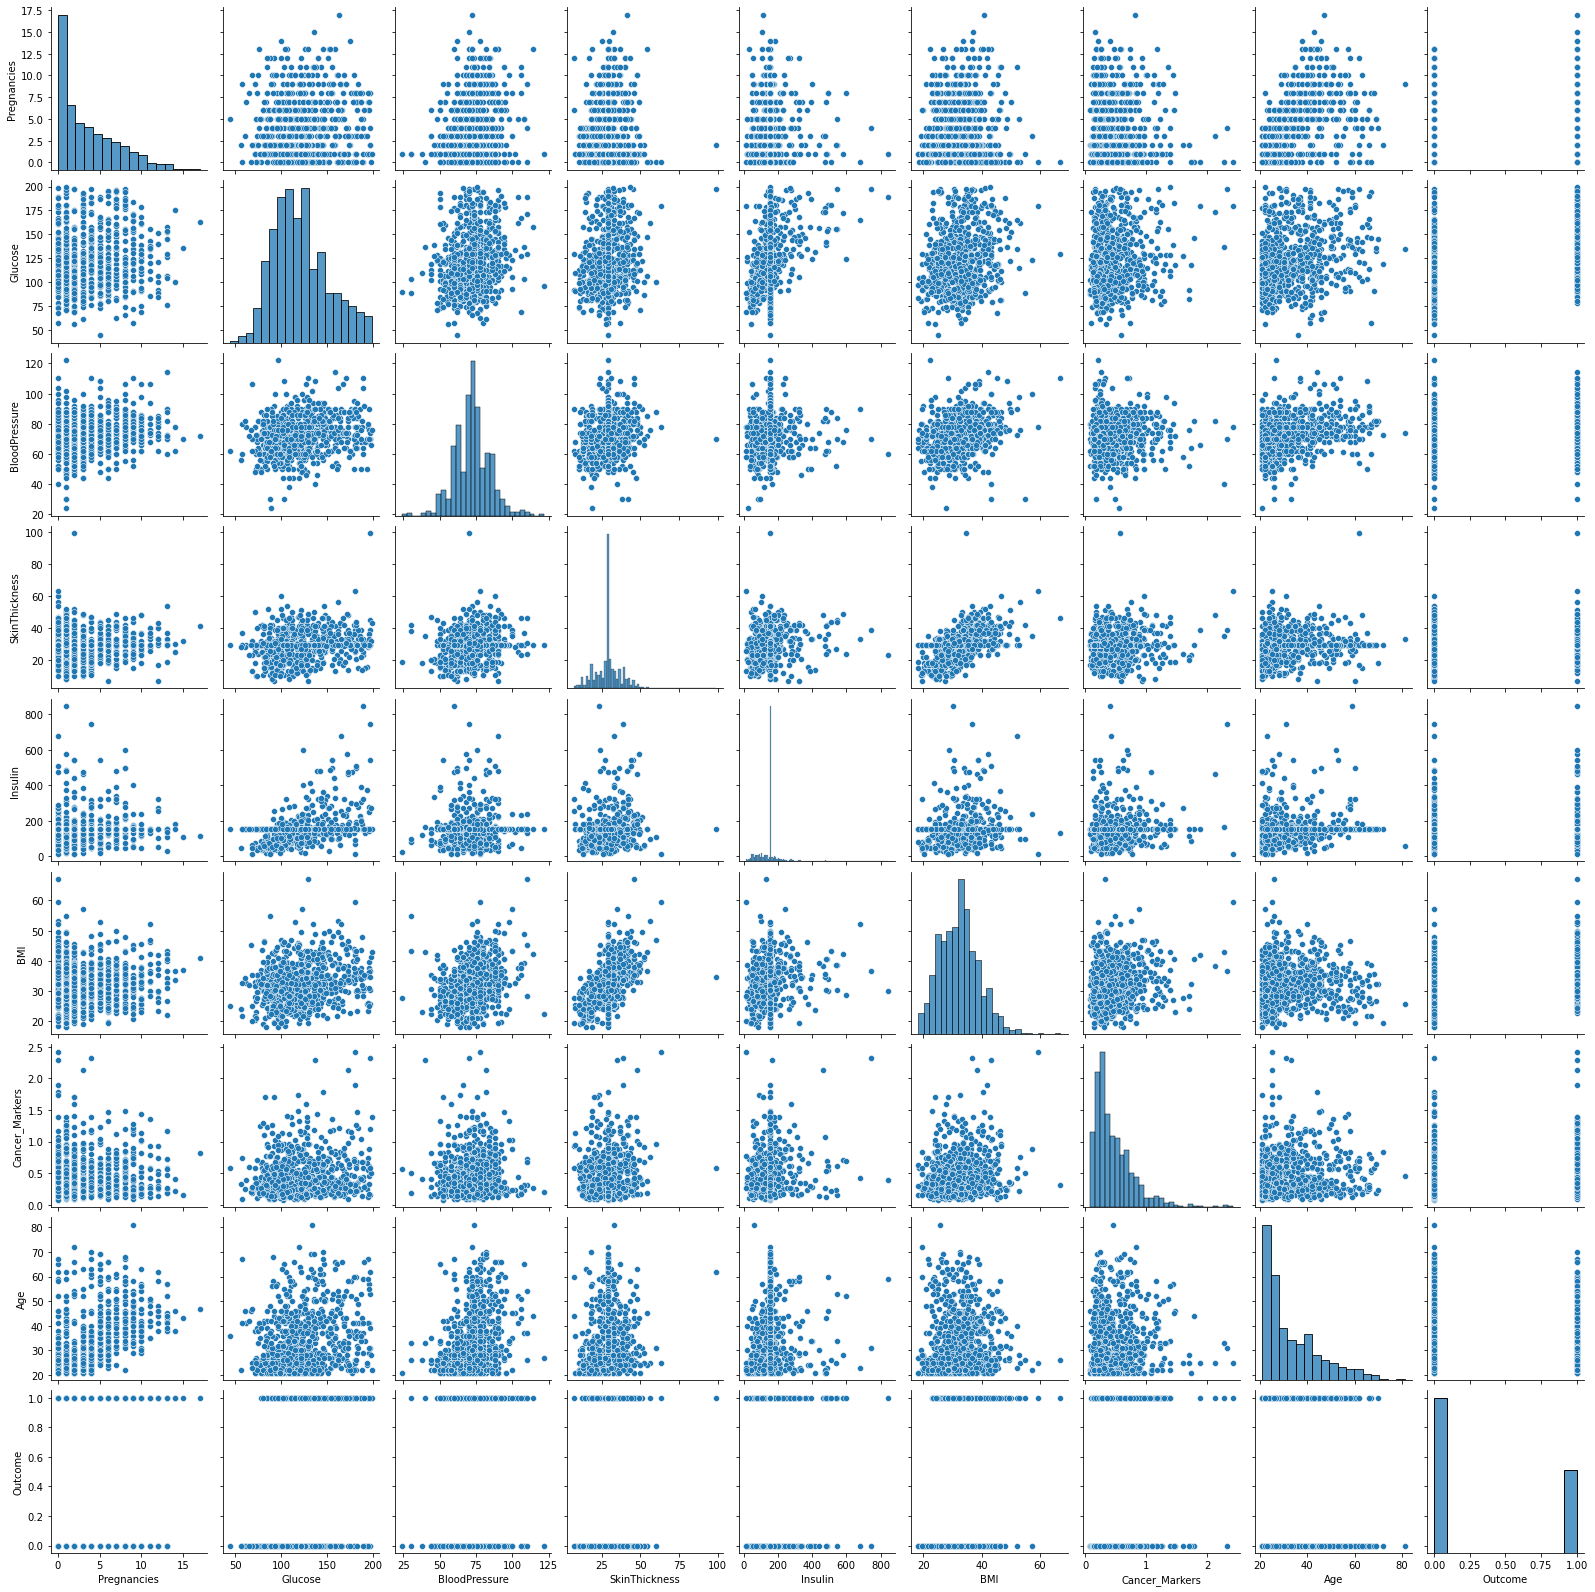

In [11]:
sns.pairplot(df)

### ScatterPlots
#### I am just plotting scatterplots to take a close look at the relationship of attributes with the outcome

<AxesSubplot:xlabel='Age', ylabel='Outcome'>

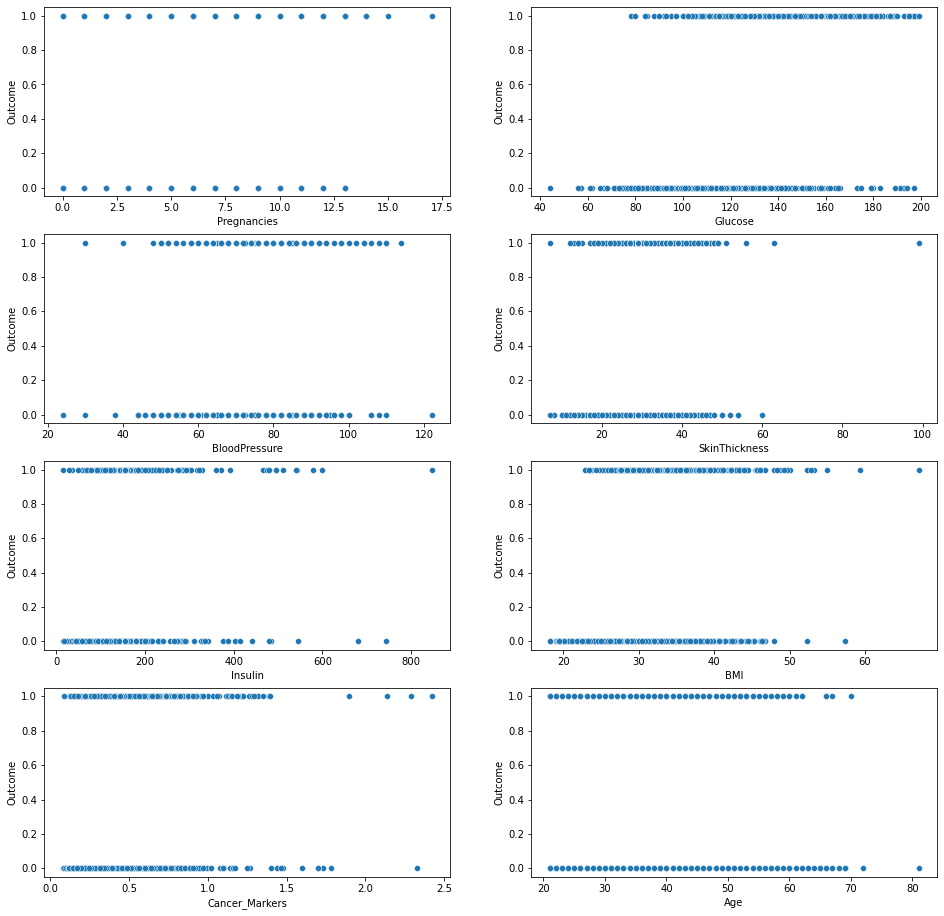

In [12]:
fig, axes = plt.subplots(4,2, figsize=(16,16))

sns.scatterplot(x=df.Pregnancies, y=df.Outcome, data=df, ax=axes[0,0])
sns.scatterplot(x=df.Glucose, y=df.Outcome, data=df, ax=axes[0,1])
sns.scatterplot(x=df.BloodPressure, y=df.Outcome, data=df, ax=axes[1,0])
sns.scatterplot(x=df.SkinThickness, y=df.Outcome, data=df, ax=axes[1,1])
sns.scatterplot(x=df.Insulin, y=df.Outcome, data=df, ax=axes[2,0])
sns.scatterplot(x=df.BMI, y=df.Outcome, data=df, ax=axes[2,1])
sns.scatterplot(x=df.Cancer_Markers, y=df.Outcome, data=df, ax=axes[3,0])
sns.scatterplot(x=df.Age, y=df.Outcome, data=df, ax=axes[3,1])

### HeatMap

<span style='background : yellow' > **Observation:**   </span>
Glucose attribute seems to have more correlation to Outcome (i.e. Cancer). 
Similarly, Age & Pregnancies have correlation between each other. 

<AxesSubplot:>

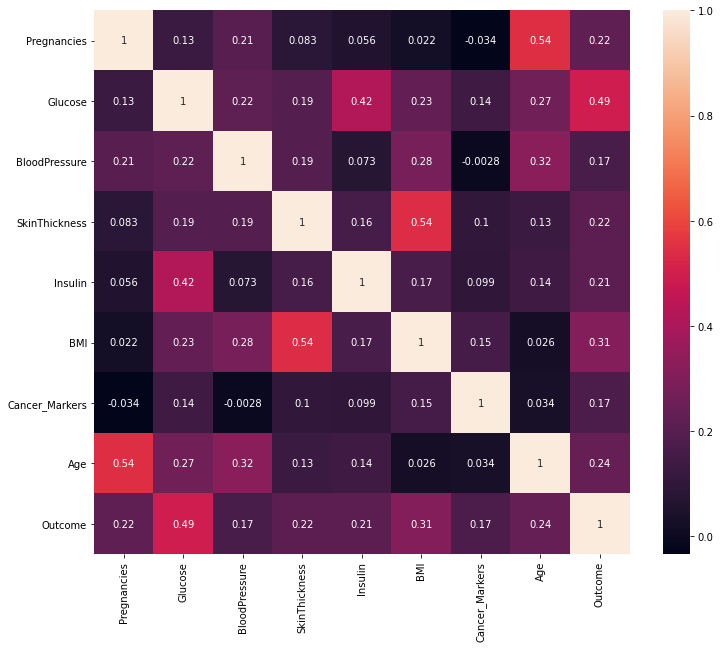

In [13]:
plt.figure(figsize=(12, 10))
correlation = df.corr()
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)

### Checking distribution & Skewness - Histogram
 <span style='background : yellow' > **Observation:**   </span>
 
Except Pregnancies and Age, rest of the attributes seem to have normal distribution however there seem to be outliers but I am not going to deal with them for this assignment. Also, Cancer_Markers attribute seem to be left skewed. These will be taken care with scaling of data. 

[Text(0.5, 1.0, 'histogram of Outcome')]

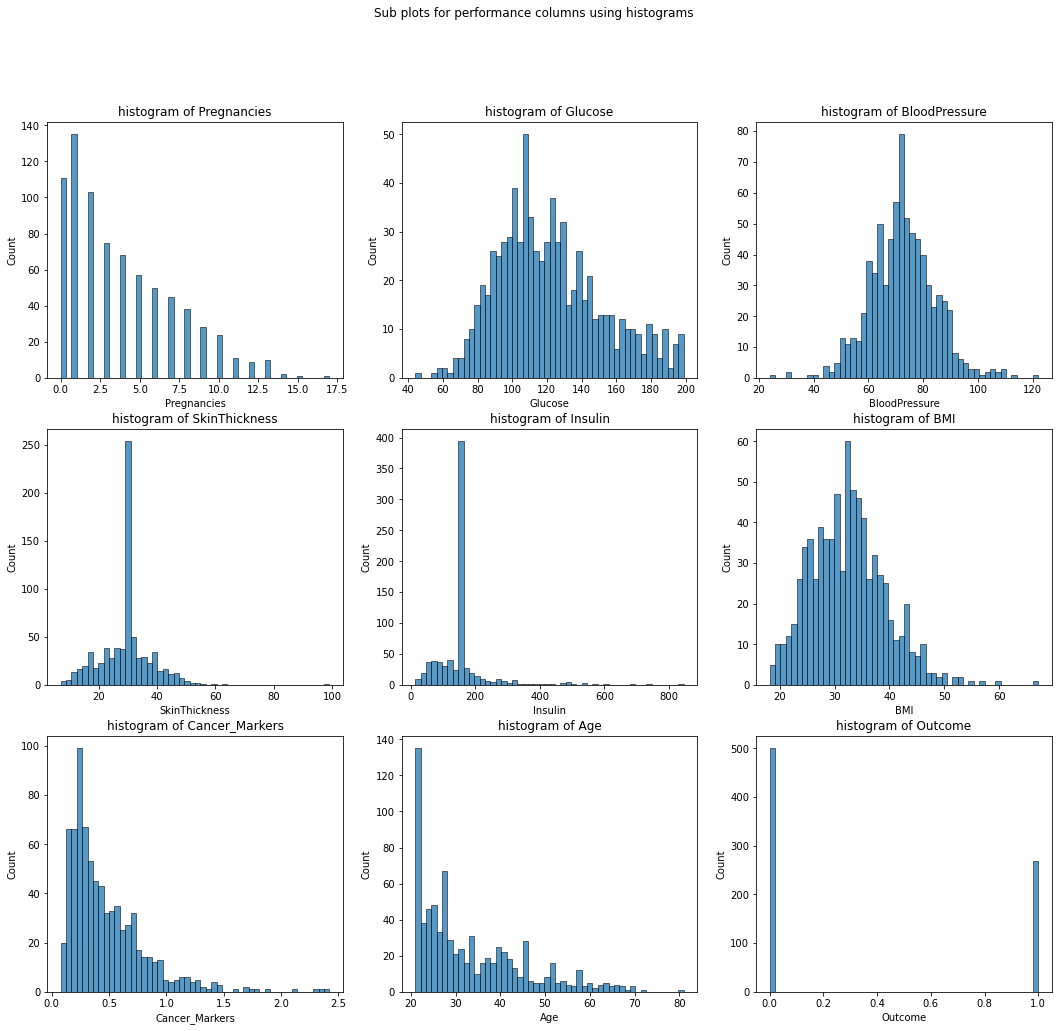

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(18, 16))
fig.suptitle('Sub plots for performance columns using histograms')
sns.histplot(ax=axes[0, 0],data=df,x='Pregnancies',bins=50).set(title="histogram of Pregnancies")
sns.histplot(ax=axes[0, 1],data=df,x='Glucose',bins=50).set(title="histogram of Glucose")
sns.histplot(ax=axes[0, 2],data=df,x='BloodPressure',bins=50).set(title="histogram of BloodPressure")
sns.histplot(ax=axes[1, 0],data=df,x='SkinThickness',bins=50).set(title="histogram of SkinThickness")
sns.histplot(ax=axes[1, 1],data=df,x='Insulin',bins=50).set(title="histogram of Insulin")
sns.histplot(ax=axes[1, 2],data=df,x='BMI',bins=50).set(title="histogram of BMI")
sns.histplot(ax=axes[2, 0],data=df,x='Cancer_Markers',bins=50).set(title="histogram of Cancer_Markers")
sns.histplot(ax=axes[2, 1],data=df,x='Age',bins=50).set(title="histogram of Age")
sns.histplot(ax=axes[2, 2],data=df,x='Outcome',bins=50).set(title="histogram of Outcome")

### SPLITTING DATA AND SCALING DATA FOR NORMALIZATION

#### <span style='color:Black'> Now lets start to prepare our data for Modeling. For this I am going to split the data into 70:30 for traindata:testdata
    
#### Before splitting I am going to scale the data using StandardScaler. 
#### StandardScaler follows Standard Normal Distribution. Therefore, it makes mean = 0 and scales the data to unit variance.
</span>

In [15]:
scaler = StandardScaler()
df1  = pd.DataFrame(scaler.fit_transform(df),columns = df.columns)
X = df1.drop('Outcome', axis=1)
y = df1[["Outcome"]]

lab_enc = preprocessing.LabelEncoder()
y = lab_enc.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30) 

## <span style='color: darkblue'>Task 2: MODEL BUILDING </span>

### KNN Classifier

In [33]:
neighbors      = np.arange(1,20)
train_accuracy = np.empty(len(neighbors))
test_accuracy  = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test,y_test)
    print("Accuracy for k=",i+1,"is",test_accuracy[i])

Accuracy for k= 1 is 0.6926406926406926
Accuracy for k= 2 is 0.696969696969697
Accuracy for k= 3 is 0.696969696969697
Accuracy for k= 4 is 0.7186147186147186
Accuracy for k= 5 is 0.7272727272727273
Accuracy for k= 6 is 0.7575757575757576
Accuracy for k= 7 is 0.7619047619047619
Accuracy for k= 8 is 0.7619047619047619
Accuracy for k= 9 is 0.7402597402597403
Accuracy for k= 10 is 0.7489177489177489
Accuracy for k= 11 is 0.7489177489177489
Accuracy for k= 12 is 0.7662337662337663
Accuracy for k= 13 is 0.7445887445887446
Accuracy for k= 14 is 0.7532467532467533
Accuracy for k= 15 is 0.7532467532467533
Accuracy for k= 16 is 0.7662337662337663
Accuracy for k= 17 is 0.7619047619047619
Accuracy for k= 18 is 0.7619047619047619
Accuracy for k= 19 is 0.7662337662337663


Accuracy seems to be highest at k values of 12, 16 & 19. I am going to consider k as 12 where we got the first highest accuracy and is almost hovering between 0.75 & 0.76 from there

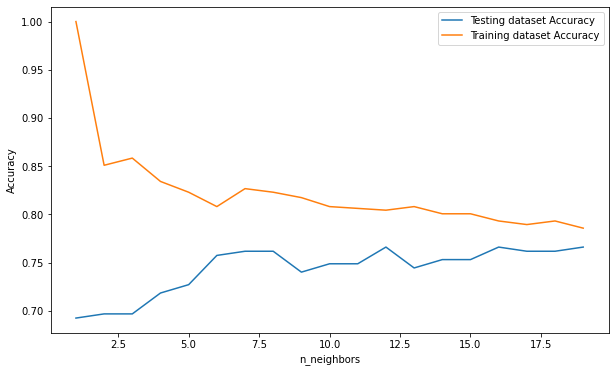

In [34]:
plt.figure(figsize=(10,6))
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

From the above accuracy plot, we can see that the accuracy of train data and test data becomes amost consistent with increasing 'k'

In [18]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=12)
#Fit the model
knn.fit(X_train,y_train)

print ('Accuracy score with k value of 12 is: ', knn.score(X_test,y_test))

Accuracy score with k value of 12 is:  0.7662337662337663


### Elbow Curve
Let's confirm the k value by plotting elbow curve with error rate.

In [19]:
error_rate = []
# Will take some time
for i in range(1,20):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

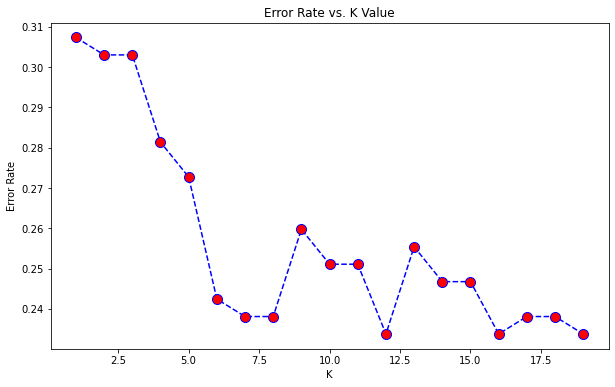

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

<span style='background : yellow' > **Observation:**   </span>
#### From the elbow curve also, the model seems to achieves low error rate at k = 12 after which the error rate hovers between 0.24 & 0.26 and achieves low error rate again at k=16 & k=19  so we are good with this value k value of 12 which we considered earlier

## <span style='color: darkblue'>Task 3: MODEL PERFORMANCE ANALYSIS </span>

### Confusion Matrix

In [21]:
#Let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[130,  29],
       [ 25,  47]], dtype=int64)

In [22]:
pd.crosstab(y_test,y_pred,rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,130,29,159
1,25,47,72
All,155,76,231


##### I am considering '0' as Positive class i.e. No Cancer and '1' as Negative class i.e. Person has Cancer
##### As per the confusion matrix, out of the 231 test records
    ### True Positives   TP = 130 
    ### False Positives  FP = 25
    ### True Negatives   TN = 47
    ### False Negatives  FN = 29

### ROC curve (receiver operating characteristic curve) 

In [23]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
y_predict = knn.predict(X_test)
for i in range(100):
    print(y_test[i],y_predict[i],y_pred_proba[i],"\n")

fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)

0 0 0.15789473684210525 

0 0 0.0 

0 1 0.5789473684210527 

0 0 0.42105263157894735 

0 0 0.15789473684210525 

0 0 0.0 

1 1 0.6842105263157895 

0 0 0.3157894736842105 

0 0 0.21052631578947367 

0 0 0.05263157894736842 

0 0 0.0 

0 0 0.3684210526315789 

0 0 0.2631578947368421 

0 0 0.10526315789473684 

0 0 0.42105263157894735 

0 0 0.0 

0 0 0.2631578947368421 

0 0 0.10526315789473684 

1 1 0.7894736842105263 

0 0 0.42105263157894735 

1 0 0.42105263157894735 

1 1 0.7368421052631579 

0 0 0.3684210526315789 

0 0 0.2631578947368421 

0 1 0.8421052631578947 

0 0 0.3684210526315789 

0 0 0.10526315789473684 

0 0 0.21052631578947367 

0 0 0.0 

1 1 0.5789473684210527 

0 0 0.2631578947368421 

0 0 0.2631578947368421 

1 1 0.5789473684210527 

1 1 0.7894736842105263 

0 0 0.0 

0 0 0.05263157894736842 

1 0 0.42105263157894735 

0 1 0.5789473684210527 

1 1 0.6842105263157895 

0 0 0.10526315789473684 

0 0 0.15789473684210525 

0 1 0.5789473684210527 

0 0 0.3157894736842105 


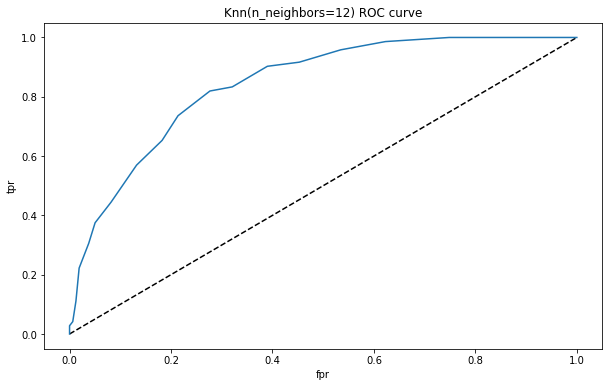

In [24]:
plt.figure(figsize=(10,6))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=12) ROC curve')
plt.show()

In [25]:
roc_auc_score(y_test,y_pred_proba)

0.8432914046121593

#### The AUC (Area Under Curve) is better with this approach for k value of 12

### HYPER PARAMETER TUNING : CROSS VALIDATION - USING GRID SEARCH

In [26]:
param_grid = {'n_neighbors':np.arange(1,20)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [27]:
knn_cv.best_score_

0.768270944741533

In [28]:
knn_cv.best_params_

{'n_neighbors': 19}

#### As per the GridSearch Cross Validation method, the best k value is 19

### FIND F1 SCORE

In [29]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy : %.2f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %.2f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall   : %.2f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred, average=None)
f1_round = [round(num, 2) for num in f1]
print('F1 score for class 0 & class 1:', f1_round)

Accuracy : 0.77
Precision: 0.62
Recall   : 0.65
F1 score for class 0 & class 1: [0.83, 0.64]


In [30]:
precision

0.618421052631579

### Classification Report with k=12

In [30]:
#The same can be checked from the classification_report too.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       159
           1       0.62      0.65      0.64        72

    accuracy                           0.77       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.77      0.77      0.77       231



#### From the above classification report, the F1 score is 0.83 for '0'(No Cancer) class and 0.64 for '1'(Cancer) class and accuracy is around 0.77

### Classification Report with k=19

In [31]:
knn1 = KNeighborsClassifier(n_neighbors=19)
#Fit the model
knn1.fit(X_train,y_train)

y_pred1 = knn1.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[130  29]
 [ 25  47]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       159
           1       0.62      0.65      0.64        72

    accuracy                           0.77       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.77      0.77      0.77       231



#### From the above classification report, the F1 score is 0.83 for '0'(No Cancer) class and 0.64 for '1'(Cancer) class and accuracy is around 0.77
### CONCLUSION::
#### *With k=12 & k=19, the F1 score and Accuracy are same.* 
#### *Hence, we could confirm the k value of 12 for our model since it is the first k with best Accuracy and F1 score.*